In [1]:
#подключение диска
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib
import pandas as pd
matplotlib.use("Agg")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle

import cv2
import os

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [6]:
# Загрузка Dataseta и предобработка данных
data=pd.read_csv("/content/drive/My Drive/Банкоматы/Train.csv")

datas=[]
labels=[]
for i in range(data.shape[0]):
  z = data.loc[i].values
  labels.append(z[4])
  z = z[1:4]
  datas.append(z)
control_list=[]
data=datas

# сохранение данных

with open("/content/drive/My Drive/Банкоматы/data.pickle", 'wb') as f:
  pickle.dump(data, f)
print("Data seved")

with open("/content/drive/My Drive/Банкоматы/labels.pickle", 'wb') as f:
  pickle.dump(labels, f)
print("Labels seved")

Data seved
Labels seved


In [7]:
# загрузка сохраненого Data сета
with open("/content/drive/My Drive/Банкоматы/data.pickle", 'rb') as f:
  data = pickle.load(f)
print("Data loaded")

with open("/content/drive/My Drive/Банкоматы/labels.pickle", 'rb') as f:
  labels = pickle.load(f)
print("Labels loaded")

labels=np.array(labels,dtype="float")
data=np.array(data,dtype="float")

# Разделение Data сета на два (тренеровочный и тестовый)
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
                                                  test_size=0.15,
                                                  random_state=42)

print("Dataset prepared")

Data loaded
Labels loaded
Dataset prepared


Model compiled


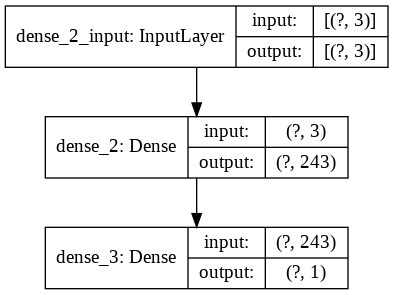

In [10]:
#Построение модели
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.utils import plot_model
from IPython.display import display, Image

def my_plot(model):
  plot_model(
      model,
      to_file="model.png",
      show_shapes=True,
      show_layer_names=True,
      rankdir="TB",
      #expand_nested=False,
      #dpi=96
  )
  image = Image('model.png')
  display(image)



model = Sequential()
model.add(Dense(243, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])



print ("Model compiled")
my_plot(model)

In [11]:
model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=2)


# сохранение обученной модели для дальнейшего импользования и обучения 
model.save("/content/drive/My Drive/Банкоматы/EasyNet1.model")

Epoch 1/200
703/703 - 1s - loss: 16878298726400.0000 - mae: 2565232.0000
Epoch 2/200
703/703 - 1s - loss: 9507006578688.0000 - mae: 2030409.7500
Epoch 3/200
703/703 - 1s - loss: 8687610494976.0000 - mae: 2054334.2500
Epoch 4/200
703/703 - 1s - loss: 8572037496832.0000 - mae: 2115197.7500
Epoch 5/200
703/703 - 1s - loss: 8452425908224.0000 - mae: 2077665.7500
Epoch 6/200
703/703 - 1s - loss: 8337822842880.0000 - mae: 2077880.2500
Epoch 7/200
703/703 - 1s - loss: 8193083179008.0000 - mae: 2061174.3750
Epoch 8/200
703/703 - 1s - loss: 8037537939456.0000 - mae: 2083503.0000
Epoch 9/200
703/703 - 1s - loss: 7957865562112.0000 - mae: 2028026.3750
Epoch 10/200
703/703 - 1s - loss: 7832229380096.0000 - mae: 2020982.3750
Epoch 11/200
703/703 - 1s - loss: 7719989805056.0000 - mae: 2029516.5000
Epoch 12/200
703/703 - 1s - loss: 7606880960512.0000 - mae: 1998877.8750
Epoch 13/200
703/703 - 1s - loss: 7521262108672.0000 - mae: 1999199.0000
Epoch 14/200
703/703 - 1s - loss: 7397092884480.0000 - mae:

In [12]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print("Средняя абсолютная ошибка :", mae)

Средняя абсолютная ошибка : 1706505.0
